# Tutorial and Sample Code for Balancing a Pole on a Cart

## Installing dependencies:

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.3.0
    Uninstalling pygame-2.3.0:
      Successfully uninstalled pygame-2.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.0
    Uninstalling setuptools-67.6.0:
      Successfully uninstalled setuptools-67.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


## Importing dependencies and define helper functions

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
#import tensorflow as tf
#from tensorflow import keras
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Tutorial: Loading CartPole environment

In [ ]:
env = gym.make("CartPole-v1")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [ ]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity.

In [ ]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [ ]:
observation, _ = env.reset()
print("Initial observations:", observation)

Initial observations: [0.01390271 0.045024   0.02362136 0.04381452]


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [ ]:
observation, reward, done, info, _ = env.step(0)
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)

New observations after choosing action 0: [ 0.01252115 -0.2366443   0.02402967  0.30526802]
Reward for this step: 1.0
Is this round done? False


Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [ ]:
observation = env.reset()[0]
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, info, _ = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 10.0


In [ ]:
gym.__version__

'0.25.2'

# IMPORTANT NOTES: PLEASE READ

# **Important: This notebook runs on gym version v26**, if using gym v21, 

1.   Change state, _ = env.reset() to just state = env.reset()
2.   Change observation_, reward, done, info, _ = env.step(action) to observation_, reward, done, info = env.step(action)

Read more here: https://gymnasium.farama.org/content/migration-guide/




## To train the agent, a CUDA enabled GPU is required. This Agent was originally trained with a RTX 2070 SUPER GPU

## To simply load our pre-trained model, run: 

agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=2, eps_end=0.01, input_dims=[4], lr=0.001)
<br> agent.load_models()

### Important note: Change chkpt_dir under DeepQNetwork class to full directory where the "models" file is

## Task 1: Development of an RL agent

## Agent source citation:
The agent used Deep Q-Learning with Experience Replay based on this paper "[Playing Atari with Deep Reinforcement Learning](https://arxiv.org/pdf/1312.5602.pdf)" published by DeepMind. A brief overview of the method would be given below later.

## Code source citation:
The Agent was implemented with PyTorch, and code used was heavily inspired by our group member Teng Yao Long's current URECA research project, which involves  Deep Reinforcement Learning methods such as DQNs and DDPGs.

## Team members and contributions:
Teng Yao Long: Coding and research. 

Anson: Coding and formatting notebook.

Justin: Coding and testing.

# Algorithm used:

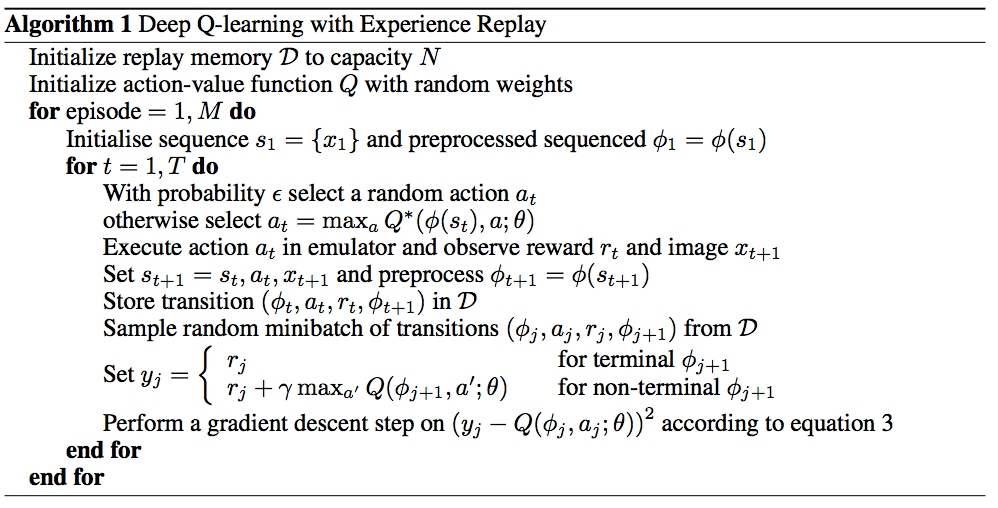

# **Explanation:**

A DQN, or Deep Q-Network, approximates a state-value function in a Q-Learning framework directly with a neural network. The TD update is gradually shifting the Q value for (s,a) towards r+max a Q(s′,a). It eventually converges to the optimal Q-function.

This is used in conjunction with Experience Replay for storing the episode steps in memory for off-policy learning, where samples are drawn from the replay memory at random. Taking samples in a row from an environment would clearly be correlated, and subject to distributional shift. The original motivation for using a replay memory was to “alleviate the problems of correlated data and non-stationary distributions” by “smooth[ing] the training distribution over many past behaviors”.

Additionally, we have cloned target networks, which are updated every k steps. This makes training more stable by preventing short-term oscillations from a moving target (Q values do not chase itself).



In [ ]:
import os
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
class DeepQNetwork(nn.Module):
    def __init__(self, beta, input_dims, fc1_dims, fc2_dims, n_actions, name,
                 chkpt_dir=r'/content/drive/MyDrive/Cartpole_final/models'):
        super(DeepQNetwork, self).__init__()
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims
        self.fc2_dims = fc2_dims
        self.n_actions = n_actions
        self.checkpoint_file = os.path.join(chkpt_dir,name+'_dqn.pt')
        self.fc1 = nn.Linear(*(self.input_dims), self.fc1_dims)
        f1 = 1./np.sqrt(self.fc1.weight.data.size()[0])
        T.nn.init.uniform_(self.fc1.weight.data, -f1, f1)
        T.nn.init.uniform_(self.fc1.bias.data, -f1, f1)
        #self.fc1.weight.data.uniform_(-f1, f1)
        #self.fc1.bias.data.uniform_(-f1, f1)
        self.bn1 = nn.LayerNorm(self.fc1_dims)

        self.fc2 = nn.Linear(self.fc1_dims, self.fc2_dims)
        f2 = 1./np.sqrt(self.fc2.weight.data.size()[0])
        #f2 = 0.002
        T.nn.init.uniform_(self.fc2.weight.data, -f2, f2)
        T.nn.init.uniform_(self.fc2.bias.data, -f2, f2)
        #self.fc2.weight.data.uniform_(-f2, f2)
        #self.fc2.bias.data.uniform_(-f2, f2)
        self.bn2 = nn.LayerNorm(self.fc2_dims)

        f3 = 0.003
        self.q = nn.Linear(self.fc2_dims, n_actions)
        T.nn.init.uniform_(self.q.weight.data, -f3, f3)
        T.nn.init.uniform_(self.q.bias.data, -f3, f3)
        #self.q.weight.data.uniform_(-f3, f3)
        #self.q.bias.data.uniform_(-f3, f3)

        self.loss = nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=beta)
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cuda:1')
        self.to(self.device)


    def forward(self, state):
        x = self.fc1(state)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        q_values = self.q(x)
        return q_values

    def save_checkpoint(self):
        print('... saving checkpoint ...')
        T.save(self.state_dict(), self.checkpoint_file)

    def load_checkpoint(self):
        print('... loading checkpoint ...')
        self.load_state_dict(T.load(self.checkpoint_file))

class Agent:
    def __init__(self, gamma, epsilon, lr, input_dims, batch_size, n_actions,
                 max_mem_size=100000, eps_end=0.05, eps_dec=5e-4):
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_min = eps_end
        self.eps_dec = eps_dec
        self.lr = lr
        self.action_space = [i for i in range(n_actions)]
        self.mem_size = max_mem_size
        self.batch_size = batch_size
        self.mem_cntr = 0
        self.iter_cntr = 0
        self.replace_target = 50

        self.Q_eval = DeepQNetwork(lr, n_actions=n_actions,
                                   input_dims=input_dims,
                                   fc1_dims=256, fc2_dims=256, name='Q_Network')
        self.Target_Q_network = DeepQNetwork(lr, n_actions=n_actions,
                                           input_dims=input_dims,
                                           fc1_dims=256, fc2_dims=256, name='Target_Q_Network')

        self.state_memory = np.zeros((self.mem_size, *input_dims),
                                     dtype=np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_dims),
                                         dtype=np.float32)
        self.action_memory = np.zeros(self.mem_size, dtype=np.int32)
        self.reward_memory = np.zeros(self.mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)

        self.Target_Q_network.load_state_dict(self.Q_eval.state_dict())

    def store_transition(self, state, action, reward, state_, terminal):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = terminal

        self.mem_cntr += 1

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor(np.array(observation)).to(self.Q_eval.device)
            actions = self.Q_eval.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)

        return action
    
    def choose_action_test_stage(self, observation):

        state = T.tensor(np.array(observation)).to(self.Q_eval.device)
        actions = self.Q_eval.forward(state)
        action = T.argmax(actions).item()

        return action
    
    def learn(self):
        if self.mem_cntr < self.batch_size:
            return

        self.Q_eval.optimizer.zero_grad()

        max_mem = min(self.mem_cntr, self.mem_size)
        batch = np.random.choice(max_mem, self.batch_size, replace=False)
        batch_index = np.arange(self.batch_size, dtype=np.int32)

        state_batch = T.tensor(self.state_memory[batch]).to(self.Q_eval.device)
        new_state_batch = T.tensor(
            self.new_state_memory[batch]).to(self.Q_eval.device)
        action_batch = self.action_memory[batch]
        reward_batch = T.tensor(
            self.reward_memory[batch]).to(self.Q_eval.device)
        terminal_batch = T.tensor(
            self.terminal_memory[batch]).to(self.Q_eval.device)

        q_eval = self.Q_eval.forward(state_batch)[batch_index, action_batch]
        q_next = self.Target_Q_network.forward(new_state_batch)
        q_next[terminal_batch] = 0.0
        q_target = reward_batch + self.gamma * T.max(q_next, dim=1)[0]

        loss = self.Q_eval.loss(q_target, q_eval).to(self.Q_eval.device)
        loss.backward()
        self.Q_eval.optimizer.step()

        self.iter_cntr += 1

        # Periodically update the target network by Q network to target Q network
        if self.iter_cntr % self.replace_target == 0:
            self.Target_Q_network.load_state_dict(self.Q_eval.state_dict())

        self.epsilon = self.epsilon - self.eps_dec \
            if self.epsilon > self.eps_min else self.eps_min

    def save_models(self):
        self.Q_eval.save_checkpoint()
        self.Target_Q_network.save_checkpoint()

    def load_models(self):
        self.Q_eval.load_checkpoint()
        self.Target_Q_network.load_checkpoint()
        

# We will first train the agent until it achieves the best score (500) consistently.

In [19]:
agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=2, eps_end=0.01,
              input_dims=[4], lr=0.001)
scores, score_history = [], []
n_games = 500

for i in range(n_games):
    score = 0
    done = False
    observation, _ = env.reset()
    for j in range(500):
        action = agent.choose_action(observation)
        observation_, reward, done, info, _ = env.step(action)
        score += reward
        agent.store_transition(observation, action, reward,
                               observation_, done)
        agent.learn()
        observation = observation_
        env.render()

    score_history.append(score)
    print('episode ', i, 'score %.2f' % score,
          'trailing 10 games avg %.3f' % np.mean(score_history[-10:]))
    if np.mean(score_history[-10:] == 500):
               break

#agent.save_models()
#agent.load_models()


<ipython-input-17-454ed05d2bfe>:85: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)


ValueError: ignored

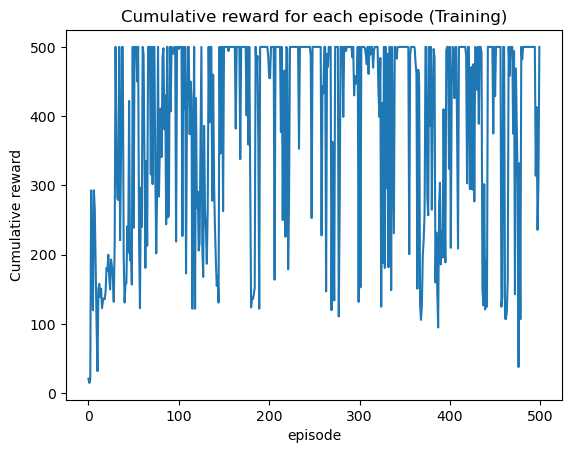

In [ ]:
plt.plot(score_history)
plt.title('Cumulative reward for each episode (Training)')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

In [ ]:
agent.save_models()

... saving checkpoint ...
... saving checkpoint ...


In [ ]:
agent.load_models()

... loading checkpoint ...
... loading checkpoint ...


For Task 1, we can show the observation and chosen action below:

In [ ]:
observation, _ = env.reset()
action = agent.choose_action_test_stage(observation)
print("Observation:", observation)
print("Chosen action:", action)


Observation: [ 0.01355532  0.04428762  0.0160887  -0.03504884]
Chosen action: 0


## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

# We proceed to test the Agent for 100 episodes

In [18]:

agent.load_models()
score_history_test = []
for i in range(100):
    score = 0
    done = False
    observation, _ = env.reset()
    for j in range(500):
        action = agent.choose_action_test_stage(observation)
        observation_, reward, done, info, _ = env.step(action)
        score += reward
        observation = observation_
        env.render()

    score_history_test.append(score)
    print('episode ', i, 'score %.2f' % score,
          'trailing 100 games avg %.3f' % np.mean(score_history_test[-100:]))

... loading checkpoint ...


<ipython-input-17-454ed05d2bfe>:85: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)


FileNotFoundError: ignored

In [ ]:
agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=2, eps_end=0.01,
              input_dims=[4], lr=0.001)
scores, score_history = [], []
n_games = 500

for i in range(n_games):
    score = 0
    done = False
    observation, _ = env.reset()
    for j in range(500):
        action = agent.choose_action(observation)
        observation_, reward, done, info, _ = env.step(action)
        score += reward
        agent.store_transition(observation, action, reward,
                               observation_, done)
        agent.learn()
        observation = observation_
        env.render()

    score_history.append(score)
    print('episode ', i, 'score %.2f' % score,
          'trailing 10 games avg %.3f' % np.mean(score_history[-10:]))
    if np.mean(score_history[-10:] == 500):
               break

#agent.save_models()
#agent.load_models()


C:\Users\Admin\AppData\Local\Temp\ipykernel_6756\4134094650.py:86: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)


episode  0 score 21.00 trailing 5 games avg 21.000
episode  1 score 15.00 trailing 5 games avg 18.000
episode  2 score 20.00 trailing 5 games avg 18.667
episode  3 score 293.00 trailing 5 games avg 87.250
episode  4 score 186.00 trailing 5 games avg 107.000
episode  5 score 120.00 trailing 5 games avg 109.167
episode  6 score 293.00 trailing 5 games avg 135.429
episode  7 score 266.00 trailing 5 games avg 151.750
episode  8 score 180.00 trailing 5 games avg 154.889
episode  9 score 99.00 trailing 5 games avg 149.300
episode  10 score 32.00 trailing 5 games avg 150.400
episode  11 score 150.00 trailing 5 games avg 163.900
episode  12 score 158.00 trailing 5 games avg 177.700
episode  13 score 139.00 trailing 5 games avg 162.300
episode  14 score 151.00 trailing 5 games avg 158.800
episode  15 score 123.00 trailing 5 games avg 159.100
episode  16 score 133.00 trailing 5 games avg 143.100
episode  17 score 137.00 trailing 5 games avg 130.200
episode  18 score 136.00 trailing 5 games avg 1

episode  152 score 500.00 trailing 5 games avg 390.900
episode  153 score 500.00 trailing 5 games avg 424.000
episode  154 score 500.00 trailing 5 games avg 460.900
episode  155 score 494.00 trailing 5 games avg 460.300
episode  156 score 500.00 trailing 5 games avg 475.700
episode  157 score 500.00 trailing 5 games avg 475.700
episode  158 score 500.00 trailing 5 games avg 475.700
episode  159 score 500.00 trailing 5 games avg 499.400
episode  160 score 500.00 trailing 5 games avg 499.400
episode  161 score 500.00 trailing 5 games avg 499.400
episode  162 score 500.00 trailing 5 games avg 499.400
episode  163 score 382.00 trailing 5 games avg 487.600
episode  164 score 500.00 trailing 5 games avg 487.600
episode  165 score 500.00 trailing 5 games avg 488.200
episode  166 score 500.00 trailing 5 games avg 488.200
episode  167 score 500.00 trailing 5 games avg 488.200
episode  168 score 338.00 trailing 5 games avg 472.000
episode  169 score 500.00 trailing 5 games avg 472.000
episode  1

episode  301 score 153.00 trailing 5 games avg 405.400
episode  302 score 500.00 trailing 5 games avg 406.900
episode  303 score 500.00 trailing 5 games avg 406.900
episode  304 score 500.00 trailing 5 games avg 413.900
episode  305 score 500.00 trailing 5 games avg 418.100
episode  306 score 498.00 trailing 5 games avg 423.200
episode  307 score 488.00 trailing 5 games avg 427.100
episode  308 score 475.00 trailing 5 games avg 424.600
episode  309 score 500.00 trailing 5 games avg 461.400
episode  310 score 461.00 trailing 5 games avg 457.500
episode  311 score 500.00 trailing 5 games avg 492.200
episode  312 score 489.00 trailing 5 games avg 491.100
episode  313 score 500.00 trailing 5 games avg 491.100
episode  314 score 500.00 trailing 5 games avg 491.100
episode  315 score 470.00 trailing 5 games avg 488.100
episode  316 score 495.00 trailing 5 games avg 487.800
episode  317 score 500.00 trailing 5 games avg 489.000
episode  318 score 500.00 trailing 5 games avg 491.500
episode  3

episode  450 score 429.00 trailing 5 games avg 442.900
episode  451 score 500.00 trailing 5 games avg 480.400
episode  452 score 500.00 trailing 5 games avg 480.400
episode  453 score 500.00 trailing 5 games avg 480.400
episode  454 score 500.00 trailing 5 games avg 480.400
episode  455 score 500.00 trailing 5 games avg 480.400
episode  456 score 500.00 trailing 5 games avg 480.400
episode  457 score 125.00 trailing 5 games avg 442.900
episode  458 score 139.00 trailing 5 games avg 419.300
episode  459 score 500.00 trailing 5 games avg 419.300
episode  460 score 500.00 trailing 5 games avg 426.400
episode  461 score 108.00 trailing 5 games avg 387.200
episode  462 score 107.00 trailing 5 games avg 347.900
episode  463 score 118.00 trailing 5 games avg 309.700
episode  464 score 163.00 trailing 5 games avg 276.000
episode  465 score 500.00 trailing 5 games avg 276.000
episode  466 score 458.00 trailing 5 games avg 271.800
episode  467 score 500.00 trailing 5 games avg 309.300
episode  4

In [13]:
agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=2, eps_end=0.01,
              input_dims=[4], lr=0.001)
scores, score_history = [], []
n_games = 500

for i in range(n_games):
    score = 0
    done = False
    observation, _ = env.reset()
    for j in range(500):
        action = agent.choose_action(observation)
        observation_, reward, done, info, _ = env.step(action)
        score += reward
        agent.store_transition(observation, action, reward,
                               observation_, done)
        agent.learn()
        observation = observation_
        env.render()

    score_history.append(score)
    print('episode ', i, 'score %.2f' % score,
          'trailing 10 games avg %.3f' % np.mean(score_history[-10:]))
    if np.mean(score_history[-10:] == 500):
               break

#agent.save_models()
#agent.load_models()


KeyboardInterrupt: ignored

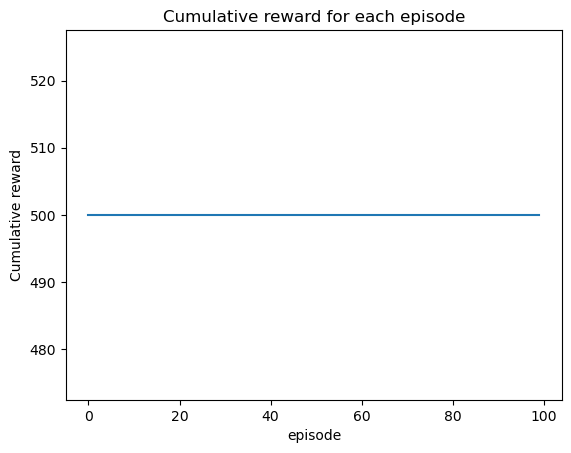

In [ ]:
plt.plot(score_history_test)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

Print the average reward over the 100 episodes.

In [ ]:
print("Average cumulative reward:", sum(score_history_test)/len(score_history_test))
print("Is my agent good enough?", sum(score_history_test)/len(score_history_test) > 195)

Average cumulative reward: 500.0
Is my agent good enough? True


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [ ]:

env = RecordVideo(gym.make("CartPole-v1"), "./video")
state = env.reset()
agent = Agent(gamma=0.99, epsilon=1.0, batch_size=64, n_actions=2, eps_end=0.01, input_dims=[4], lr=0.001)
agent.load_models()
total_rewards = []
done = False

while not done:

    env.render()
    #your agent goes here
    action = agent.choose_action_test_stage(state)
    #action = theta_omega_policy(state)
    observation, reward, done, info = env.step(action)
  
env.close()
show_video()


# If video does not play on notebook, try running on Google Colab. Below is video we got from ourselves

In [ ]:
import os
dir = os.getcwd()
s = dir + r"\video.mp4"
raw_s = r'{}'.format(s)
print(raw_s)

/content/video.mp4


In [ ]:
from ipywidgets import Video
#if not on colab, change first argument to raw_s
Video.from_file(r"/content/drive/MyDrive/Cart_final/video.mp4", width=320, height=320)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x00y\xbamdat\x00\x…